# EDA (`E`xploratory `D`ata `A`nalysis) 
- The reasoning behind this approach was to examine the data before building a model
- Today almost every Data scientists and analysts spend most of their time in `Data Wrangling` and `Exploratory Data Analysis also known as EDA`

# What is Exploratory Data Analysis?

Exploratory Data Analysis or EDA technique is used for getting insights from the data. Data Scientists and Analysts try to find `different patterns`, `relations`, and `anomalies in the data` using some statistical graphs and other visualization techniques. Following things are part of EDA :

- Get maximum insights from a data set
- Uncover underlying structure
- Extract important variables from the dataset
- Detect outliers and anomalies(if any)
- Test underlying assumptions
- Determine the optimal factor settings


# Why EDA is important?
- The main purpose of EDA is to 
- Detect any errors, 
- Outliers as well as 
- To understand different patterns in the data. 
- It allows Analysts to understand the data better before making any assumptions. 
- The outcomes of EDA helps businesses to know their customers, expand their business and take decisions accordingly.

# How to perform EDA?

- Following steps are most commonly used to perform EDA:
    

## Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

## Set display option in pandas to see more number of columns rather `...`

In [32]:
pd.set_option("display.max_columns",100)

## Read Data set and see top and bottom rows to have quick glimpse of data

In [97]:
df = pd.read_csv("DS_Salary_2021.csv")

In [98]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [99]:
df.tail(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1,0,0,61,126,93.5,Riverside Research Institute,OH,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,M


## min and max salary

## Get shape of data to understand number of observations

In [100]:
df.shape

(742, 42)

## Get Feature names of dataset

In [101]:
df.keys()

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [102]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

## Get full Decription/summary of dataset

In [103]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Get full info about all variables/features of dataset

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

## Understand the data types of Dataset and downgrade its type to save memory

In [105]:
for k in df.keys():
#     print(df[k].dtype)
    if "int64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())

index int64 0 955
Founded int64 -1 2019
Hourly int64 0 1
Employer provided int64 0 1
Lower Salary int64 15 202
Upper Salary int64 16 306
Age int64 -1 277
Python int64 0 1
spark int64 0 1
aws int64 0 1
excel int64 0 1
sql int64 0 1
sas int64 0 1
keras int64 0 1
pytorch int64 0 1
scikit int64 0 1
tensor int64 0 1
hadoop int64 0 1
tableau int64 0 1
bi int64 0 1
flink int64 0 1
mongo int64 0 1
google_an int64 0 1


In [106]:
for k in df.keys():
    if "int64" in str(df[k].dtype) and df[k].max() <=255:
        df[k] = df[k].astype("int8")

In [107]:
for k in df.keys():
    if "int64" in str(df[k].dtype) and df[k].max() >255:
        df[k] = df[k].astype("int16")

### fot lfloat

In [108]:
for k in df.keys():
#     print(df[k].dtype)
    if "float64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())

Rating float64 -1.0 5.0
Avg Salary(K) float64 15.5 254.0


In [109]:
for k in df.keys():
    if "float64" in str(df[k].dtype):
        df[k] = df[k].astype("float16")

In [110]:
df.dtypes

index                   int16
Job Title              object
Salary Estimate        object
Job Description        object
Rating                float16
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int16
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                   int8
Employer provided        int8
Lower Salary             int8
Upper Salary            int16
Avg Salary(K)         float16
company_txt            object
Job Location           object
Age                     int16
Python                   int8
spark                    int8
aws                      int8
excel                    int8
sql                      int8
sas                      int8
keras                    int8
pytorch                  int8
scikit                   int8
tensor                   int8
hadoop    

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int16  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float16
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int16  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int8   
 16  Employer

## See if any missing values are present in data set

In [112]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M


In [113]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M


## Extract min and max salary from `Salary Estimate` feature

In [114]:
df["Salary Estimate"]

0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
737    $58K-$111K (Glassdoor est.)
738    $72K-$133K (Glassdoor est.)
739     $56K-$91K (Glassdoor est.)
740    $95K-$160K (Glassdoor est.)
741    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 742, dtype: object

In [115]:
lam = lambda text:text.split("-")

In [116]:
lam(df["Salary Estimate"][0])

['$53K', '$91K (Glassdoor est.)']

## Lets use re to make extraction more meaningful

In [117]:
import re

In [118]:
def getMinSal(text):
    so = re.search("\$(\d+)K-\$(\d+)K",text)
    if so:
        return int(so.group(1))
getMinSal(df["Salary Estimate"][0])    

53

In [119]:
def getMaxSal(text):
    so = re.search("\$(\d+)K-\$(\d+)K",text)
    if so:
        return int(so.group(2))
getMaxSal(df["Salary Estimate"][0])    

91

In [120]:
df["min_sal"] = df["Salary Estimate"].map(getMinSal)
df["max_sal"] = df["Salary Estimate"].map(getMaxSal)

In [121]:
df["min_sal"]

0      53.0
1      63.0
2      80.0
3      56.0
4      86.0
       ... 
737    58.0
738    72.0
739    56.0
740    95.0
741    61.0
Name: min_sal, Length: 742, dtype: float64

In [122]:
df["max_sal"]

0       91.0
1      112.0
2       90.0
3       97.0
4      143.0
       ...  
737    111.0
738    133.0
739     91.0
740    160.0
741    126.0
Name: max_sal, Length: 742, dtype: float64

In [123]:
df.head(1)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0


In [129]:
def cleanJobDes(text):
    op = re.sub("[^a-zA-Z0-9]"," ",text)
#     op = "".join([w for w in op if w not in STOPWORDS])
    return op

In [130]:
# df["Job Description"].map(cleanJobDes)
df["Job Description"] = df["Job Description"].map(cleanJobDes)

In [131]:
df["Job Description"][0]

'Data Scientist Location  Albuquerque  NM Education Required  Bachelor s degree required  preferably in math  engineering  business  or the sciences  Skills Required  Bachelor s Degree in relevant field  e g   math  data analysis  database  computer science  Artificial Intelligence  AI   three years  experience credit for Master s degree  five years  experience credit for a Ph D Applicant should be proficient in the use of Power BI  Tableau  Python  MATLAB  Microsoft Word  PowerPoint  Excel  and working knowledge of MS Access  LMS  SAS  data visualization tools  and have a strong algorithmic aptitude Excellent verbal and written communication skills  and quantitative analytical skills are required Applicant must be able to work in a team environment U S  citizenship and ability to obtain a DoD Secret Clearance required Responsibilities  The applicant will be responsible for formulating analytical solutions to complex data problems  creating data analytic models to improve data metrics 

## Join Complete Job description to visualize WordCloud

In [132]:
text = " ".join(df["Job Description"])

In [134]:
# text

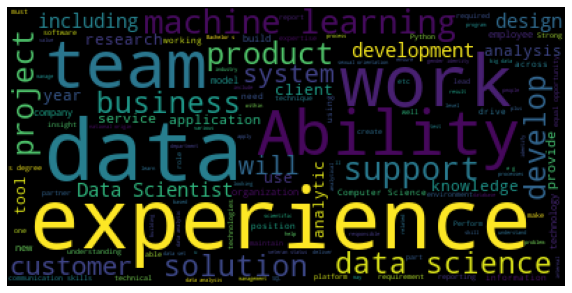

In [137]:
wc = WordCloud()
img = wc.generate_from_text(text)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

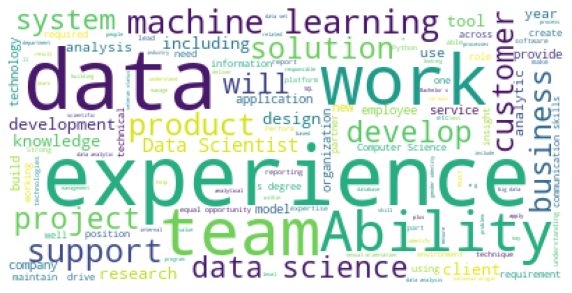

In [138]:
wc = WordCloud(background_color="white")
img = wc.generate_from_text(text)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [139]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


<AxesSubplot:xlabel='min_sal', ylabel='Density'>

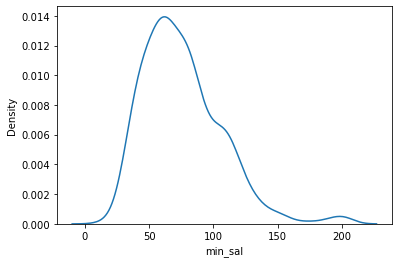

In [140]:
sns.kdeplot(df.min_sal)

<AxesSubplot:xlabel='max_sal', ylabel='Density'>

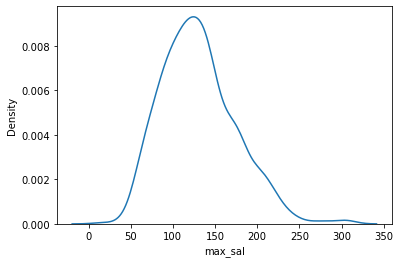

In [141]:
sns.kdeplot(df.max_sal)

<AxesSubplot:xlabel='min_sal', ylabel='Density'>

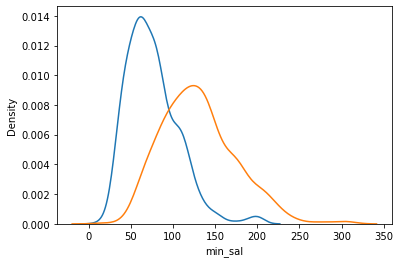

In [142]:
sns.kdeplot(df.min_sal)
sns.kdeplot(df.max_sal)

In [143]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


## Get unique values for each feature, this will help you to get to know if any unwanted characters are present in dataset

## Visualize missing values of data set

In [148]:
df.isnull().sum()

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Hourly                 0
Employer provided      0
Lower Salary           0
Upper Salary           0
Avg Salary(K)          0
company_txt            0
Job Location           0
Age                    0
Python                 0
spark                  0
aws                    0
excel                  0
sql                    0
sas                    0
keras                  0
pytorch                0
scikit                 0
tensor                 0
hadoop                 0
tableau                0
bi                     0
flink                  0
mongo                  0
google_an              0
job_title_sim          0


## Remove Missing values

In [152]:
df = df.dropna()

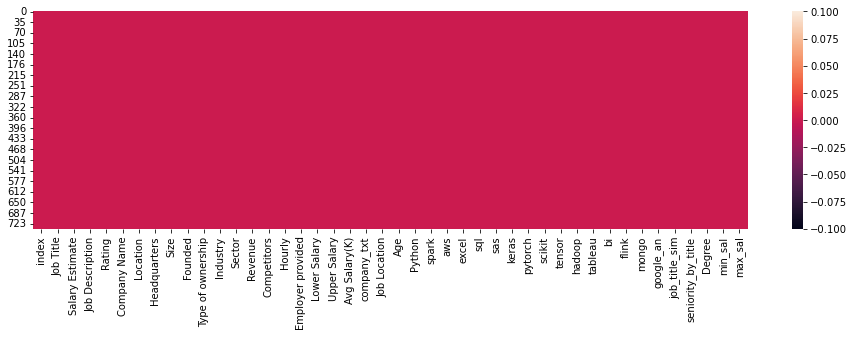

In [154]:
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [157]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


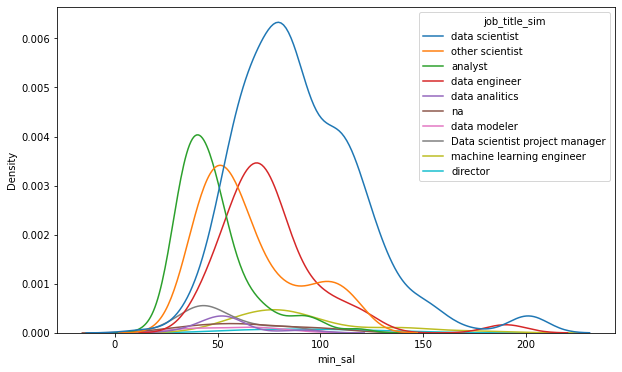

In [159]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.min_sal,hue=df["job_title_sim"])
plt.show()

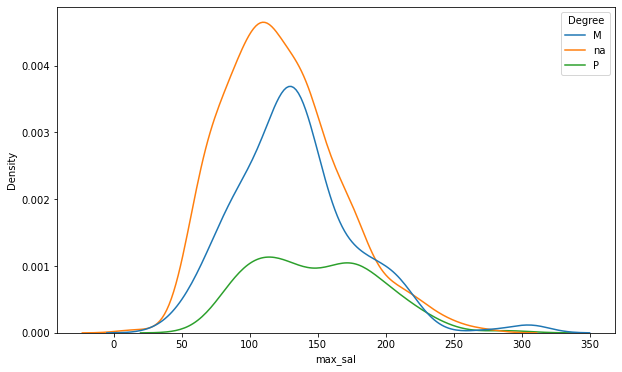

In [161]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.max_sal,hue=df["Degree"])
plt.show()

In [162]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


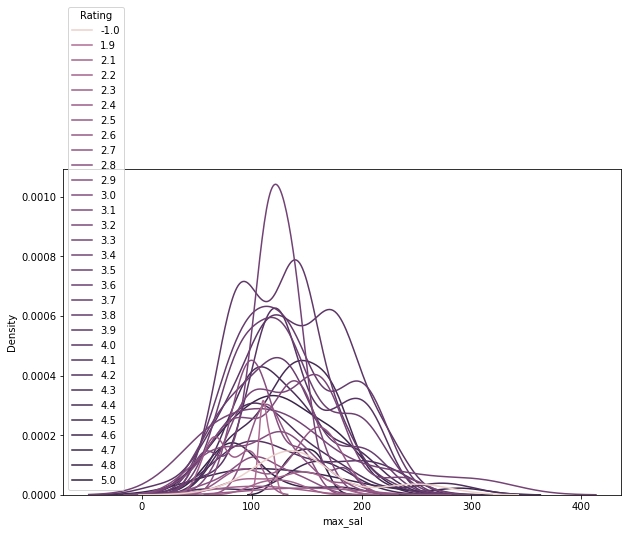

In [163]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.max_sal,hue=df["Rating"])
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


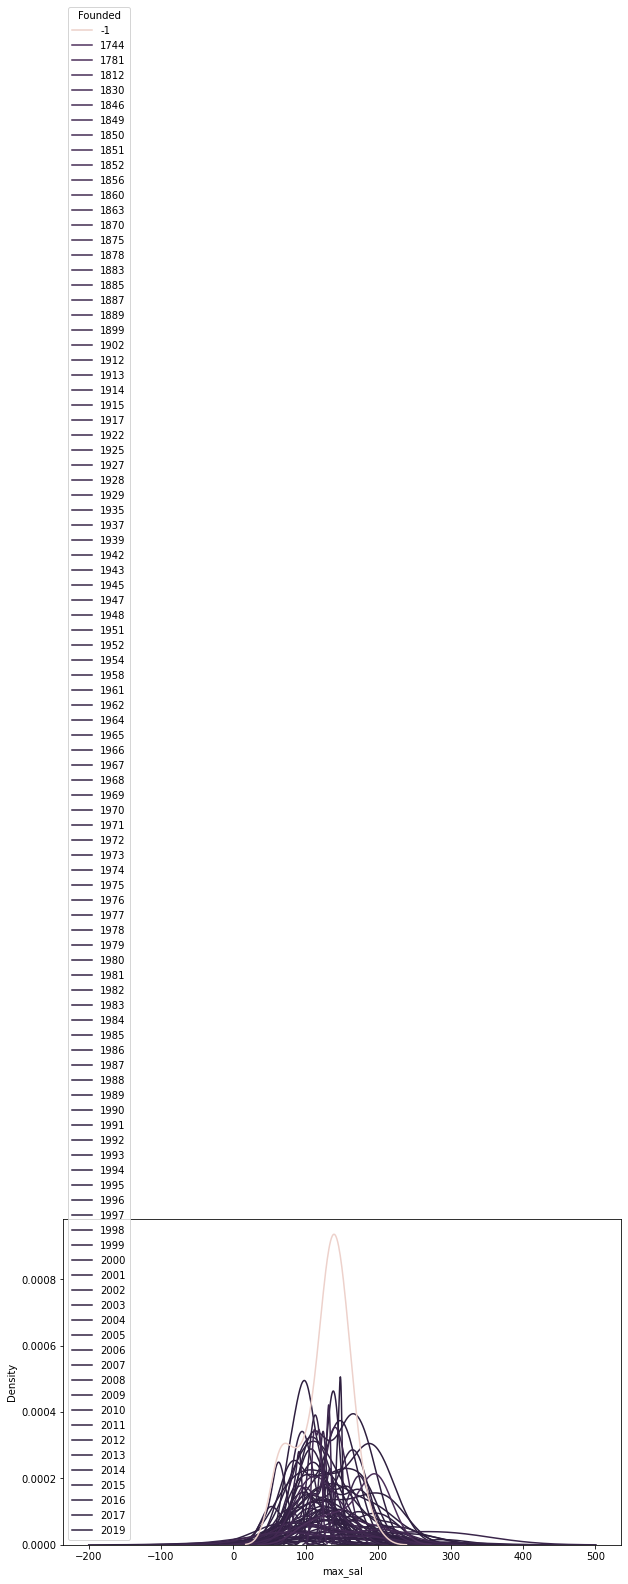

In [164]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.max_sal,hue=df["Founded"])
plt.show()

In [167]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


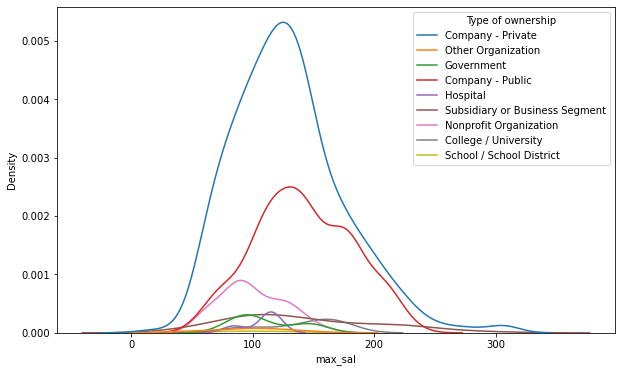

In [168]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.max_sal,hue=df["Type of ownership"])
plt.show()

<AxesSubplot:xlabel='Avg Salary(K)', ylabel='Count'>

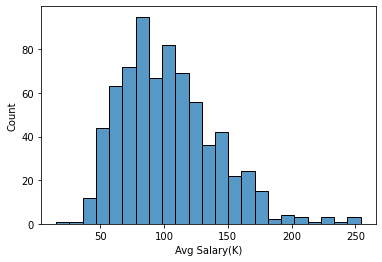

In [169]:
sns.histplot(df["Avg Salary(K)"])

<AxesSubplot:xlabel='Avg Salary(K)', ylabel='Density'>

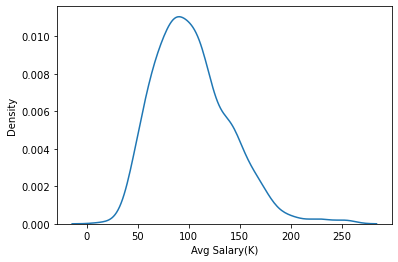

In [170]:
sns.kdeplot(df["Avg Salary(K)"])

In [171]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


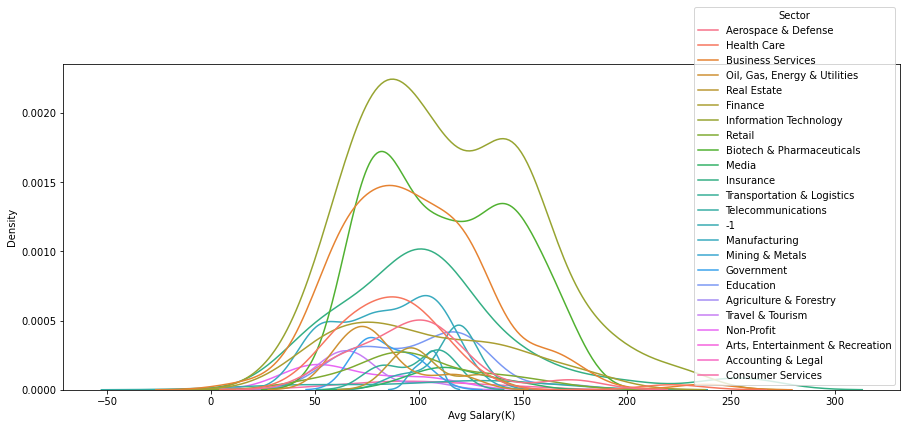

In [175]:
plt.figure(figsize=(15,6))
sns.kdeplot(df["Avg Salary(K)"],hue=df.Sector)
plt.show()

In [176]:
df.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),Data Scientist Location Albuquerque NM Educa...,3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do I General Summary The Hea...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M,63.0,112.0


/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


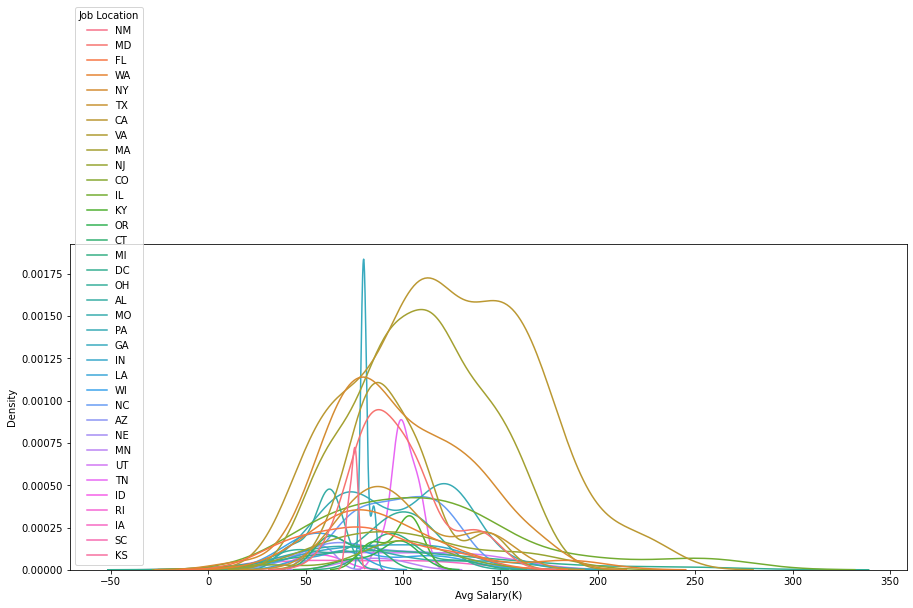

In [177]:
plt.figure(figsize=(15,6))
sns.kdeplot(df["Avg Salary(K)"],hue=df["Job Location"])
plt.show()

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


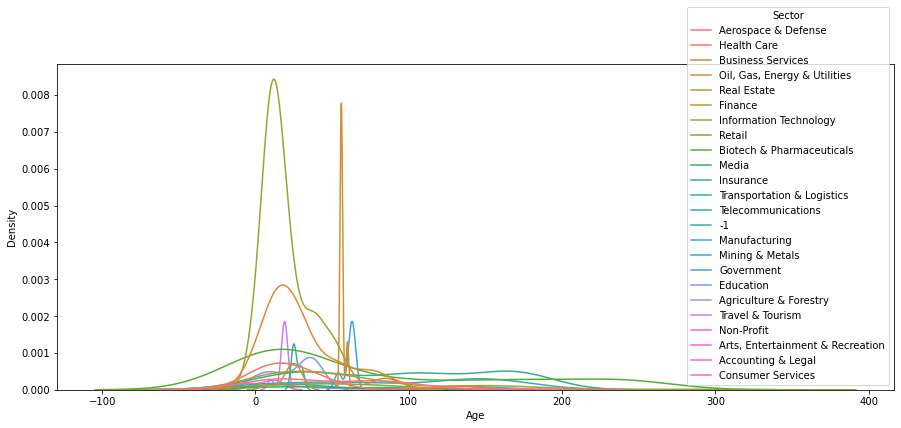

In [178]:
plt.figure(figsize=(15,6))
sns.kdeplot(df["Age"],hue=df.Sector)
plt.show()

## Decide if features needs to be dropped
- Some important factors which helps to drop feature(s):
     - If more than 10% values are empty in a given feature, drop them until it really contributes to EDA
     - Some features like person name, ID, pin code, SSN etc. doesnt add much value because they are unique
     - There could be 2 features which is similar in nature, choose one of them

## Fill missing values
- Some important factors which helps to fill empty data
    - if feature has `categorical data` then replace empty value using `mode()`
    - if feature has `discrete data` and range is very less (1-10), go with `mode()`,because they will be categorical data else go with `median()`
    - if feature has `continous data` then go with `median()`

## Find out correlation and perform visualization using heatmap

In [184]:
# NA

## Find out highly correlated features

In [183]:
# NA

## Find out features which needs type casting

In [179]:
# Shown Above

## Visualize missing values again to make sure that all features are having `0` missing values

In [179]:
# Shown Above

# Infer insights of Data after All the above process are completed using Visualization

## Count of categorical data

In [179]:
# Shown Above

## Histogram for discrete data to understand central tendency of data

In [179]:
# Shown Above

## Correlation between various features

In [180]:
# Home Work

## Trend of discrete or continious feature (if data available)

In [181]:
# NA

## KDE plot to see how data is spread

In [179]:
# Shown Above